## Import Libraries

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import joblib
import matplotlib.pyplot as plt
import seaborn as sns


## Load Processed Data

In [2]:
# Load the processed dataset
data = pd.read_csv('../data/processed/data_processed.csv')

# Separate features and target variable
X = data.drop(columns=['SalePrice'])  # Replace 'SalePrice' with the actual target column name
y = data['SalePrice']


## Identify the top 5 important features

In [3]:
# Train a Random Forest Regressor to get feature importances
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X, y)

# Get feature importances
NUM_FEATURES = 5  # 5 important features
feature_importances = pd.Series(model.feature_importances_, index=X.columns)
top_features = feature_importances.nlargest(NUM_FEATURES).index.tolist()
print("Top 5 Important Features:", top_features)

X = X[top_features]

Top 5 Important Features: ['OverallQual', 'GrLivArea', 'TotalBsmtSF', 'BsmtFinSF1', '2ndFlrSF']


## Split Data

In [4]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training set size:", X_train.shape)
print("Testing set size:", X_test.shape)

Training set size: (1168, 5)
Testing set size: (292, 5)


## Model Training

### Linear Regression

In [5]:
# Train Linear Regression model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Predict on test data
y_pred_lr = lr_model.predict(X_test)

# Evaluate the model
lr_rmse = np.sqrt(mean_squared_error(y_test, y_pred_lr))
lr_r2 = r2_score(y_test, y_pred_lr)

print("Linear Regression RMSE:", lr_rmse)
print("Linear Regression R²:", lr_r2)


Linear Regression RMSE: 0.4983371741084926
Linear Regression R²: 0.7958069251703


### Decision Tree Regressor

In [6]:
# Train Decision Tree Regressor
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)

# Predict on test data
y_pred_dt = dt_model.predict(X_test)

# Evaluate the model
dt_rmse = np.sqrt(mean_squared_error(y_test, y_pred_dt))
dt_r2 = r2_score(y_test, y_pred_dt)

print("Decision Tree RMSE:", dt_rmse)
print("Decision Tree R²:", dt_r2)


Decision Tree RMSE: 0.5063729813791404
Decision Tree R²: 0.7891685049100299


### Random Forest Regressor

In [7]:
# Train Random Forest Regressor
rf_model = RandomForestRegressor(random_state=42, n_estimators=100)
rf_model.fit(X_train, y_train)

# Predict on test data
y_pred_rf = rf_model.predict(X_test)

# Evaluate the model
rf_rmse = np.sqrt(mean_squared_error(y_test, y_pred_rf))
rf_r2 = r2_score(y_test, y_pred_rf)

print("Random Forest RMSE:", rf_rmse)
print("Random Forest R²:", rf_r2)


Random Forest RMSE: 0.3764083037070625
Random Forest R²: 0.8835035128412797


## Model Comparison

               Model      RMSE        R²
0  Linear Regression  0.498337  0.795807
1      Decision Tree  0.506373  0.789169
2      Random Forest  0.376408  0.883504


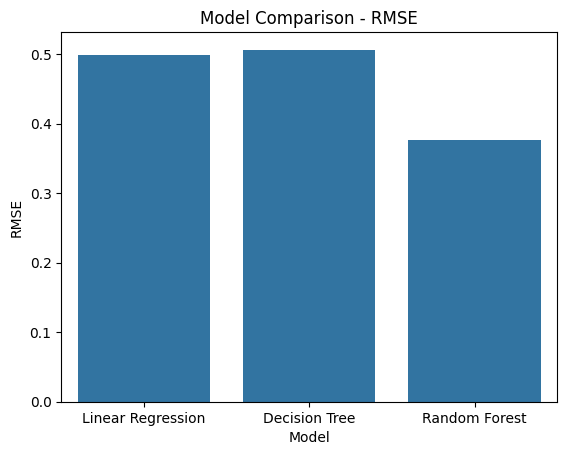

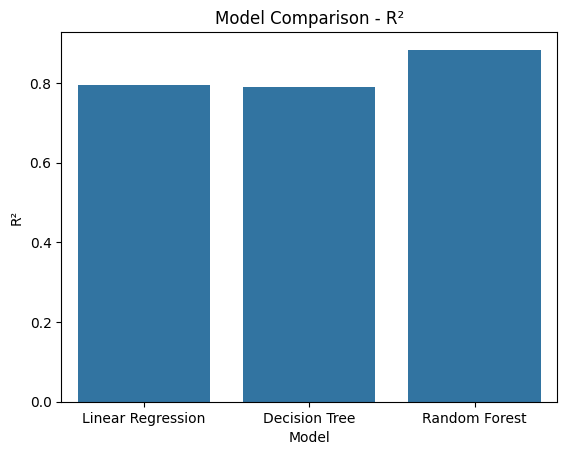

In [8]:
# Create a DataFrame for comparison
model_comparison = pd.DataFrame({
    'Model': ['Linear Regression', 'Decision Tree', 'Random Forest'],
    'RMSE': [lr_rmse, dt_rmse, rf_rmse],
    'R²': [lr_r2, dt_r2, rf_r2]
})

# Display comparison table
print(model_comparison)

# Visualize comparison
sns.barplot(x='Model', y='RMSE', data=model_comparison)
plt.title('Model Comparison - RMSE')
plt.show()

sns.barplot(x='Model', y='R²', data=model_comparison)
plt.title('Model Comparison - R²')
plt.show()


## Save the Best Model and the Scaler

In [ ]:
import os
import json
import pickle

# Define the directory path
output_dir = '../out/'

# Create the directory if it doesn't exist
os.makedirs(output_dir, exist_ok=True)

# Save the best model
best_model = rf_model  # Replace with the best-performing model
joblib.dump(best_model, '../src/best_model.pkl')

print("Best model saved as 'best_model.pkl' in out/ directory.")

# Save the top features to a JSON file
with open('../src/top_features.json', 'w') as f:
    json.dump(feature_importances.nlargest(NUM_FEATURES).to_dict(), f)
print("Top features saved:", top_features)

# Compute min and max for each selected feature
raw_data = pd.read_csv('../data/raw/raw_data.csv')

# Scale the numerical features
scaler = StandardScaler()
scaler.fit_transform(raw_data[top_features])

feature_ranges = {
    feature: {"min": float(raw_data[feature].min()), "max": float(raw_data[feature].max())}
    for feature in feature_importances.nlargest(NUM_FEATURES).to_dict()
}

# Scale target variable (SalePrice)
target_scaler = StandardScaler()
target_scaler.fit_transform(raw_data['SalePrice'].values.reshape(-1, 1))

# Save the ranges to a JSON file
with open("../src/feature_ranges.json", "w") as json_file:
    json.dump(feature_ranges, json_file, indent=4)
print("Feature ranges saved to src/feature_ranges.json")

# Save the scaler for later use in the app
with open("../src/scaler.pkl", "wb") as scaler_file:
    pickle.dump(scaler, scaler_file)
print("Feature scaler saved to src/scaler.pkl")

# Save the target scaler
with open("../src/target_scaler.pkl", "wb") as target_scaler_file:
    pickle.dump(target_scaler, target_scaler_file)
print("Target scaler saved to src/target_scaler.pkl")


Best model saved as 'best_model.pkl' in out/ directory.
Top features saved: ['OverallQual', 'GrLivArea', 'TotalBsmtSF', 'BsmtFinSF1', '2ndFlrSF']
Feature ranges saved to src/feature_ranges.json
Feature scaler saved to src/scaler.pkl
Target scaler saved to src/target_scaler.pkl
